# 

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://github.com/mauro-moura/modelagem_computacional/blob/main/P3/P3.ipynb)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Salvando saídas

import os
import glob
import shutil
from google.colab import files


path = "ouputs"

if not os.path.exists(path):
    os.makedirs(path)

sheets = glob.glob('*.xlsx')

for sheet in sheets:
  shutil.move(sheet, f"/content/{path}/{sheet}")

!zip -r /content/outputs.zip /content/ouputs

files.download("/content/outputs.zip")

# Métodos

In [ ]:
def euler(f, y_0, dt, a, b, N):
  y = np.zeros((N, len(y_0)))
  t = np.arange(a, b, dt)
  y[0] = y_0

  # Euler
  for n in range(N - 1):
    y[n + 1] = y[n] + dt * f(t[n], y[n])
  
  return y, t

def bashforth_2(f, y_0, dt, a, b, N):
  y = np.zeros((N, len(y_0)))
  t = np.arange(a, b, dt)
  y[0] = y_0

  y_rk, _ = RK4(f, y_0, dt, a, b, N)
  y[1] = y_rk[1]

  # Bashforth para s = 2
  for i in range(N - 2):
    y[i + 2] = y[i] + (dt/2) * (3 * f(t[i + 1], y[i + 1]) - f(t[i], y[i]))
  
  return y, t

def RK4(f, y_0, h, a, b, N):
  y = np.zeros((N, len(y_0)))
  t = np.arange(a, b, dt)
  y[0] = y_0

  # Runge-Kutta ordem 4
  for i in range(N - 1):
    k1 = h * f(t[i], y[i])
    k2 = h * f(t[i] + h/2, y[i] + k1/2)
    k3 = h * f(t[i] + h/2, y[i] + k2/2)
    k4 = h * f(t[i] + h, y[i] + k3)

    y[i + 1] = y[i] + (1/6) * (k1 + 2*k2 + 2*k3 + k4)
  
  return y, t

In [ ]:
def plot_sir(y, t, title = False):
  S = y[:, 0]
  I = y[:, 1]
  R = y[:, 2]

  plt.plot(t, S, label = "S")
  plt.plot(t, I, label = "I")
  plt.plot(t, R, label = "R")

  if (title): plt.title(title)
  plt.legend()

  plt.show()

def plot_seir(y, t, title = False):
  S = y[:, 0]
  E = y[:, 1]
  I = y[:, 2]
  R = y[:, 3]

  plt.plot(t, S, label = "S")
  plt.plot(t, E, label = "E")
  plt.plot(t, I, label = "I")
  plt.plot(t, R, label = "R")

  if (title): plt.title(title)
  plt.legend()

  plt.show()

def plot_seeiir(y, t, title = False):
  S = y[:, 0]
  E1 = y[:, 1]
  E2 = y[:, 2]
  I1 = y[:, 3]
  I2 = y[:, 4]
  R = y[:, 5]

  plt.plot(t, S, label = "S")
  plt.plot(t, E1, label = "E1")
  plt.plot(t, E2, label = "E2")
  plt.plot(t, I1, label = "I1")
  plt.plot(t, I2, label = "I2")
  plt.plot(t, R, label = "R")

  if (title): plt.title(title)
  plt.legend()

  plt.show()

def dict_sir(y1, y2):
  d = {
        "S Euler": y1[:, 0],
        "I Euler": y1[:, 1],
        "R Euler": y1[:, 2],
        "S Bashforth": y2[:, 0],
        "I Bashforth": y2[:, 1],
        "R Bashforth": y2[:, 2]
    }
  return d

def dict_seir(y1, y2):
  d = {
        "S Euler": y1[:, 0],
        "E Euler": y1[:, 1],
        "I Euler": y1[:, 2],
        "R Euler": y1[:, 3],
        "S Bashforth": y2[:, 0],
        "E Bashforth": y1[:, 1],
        "I Bashforth": y2[:, 2],
        "R Bashforth": y2[:, 3]
    }
  return d

def dict_seeiir(y1, y2):
  d = {
        "S Euler": y1[:, 0],
        "E Euler": y1[:, 1],
        "Ea Euler": y1[:, 2],
        "I Euler": y1[:, 3],
        "Ia Euler": y1[:, 4],
        "R Euler": y1[:, 5],
        "S Bashforth": y2[:, 0],
        "E Bashforth": y2[:, 1],
        "Ea Bashforth": y2[:, 2],
        "I Bashforth": y2[:, 3],
        "Ia Bashforth": y2[:, 4],
        "R Bashforth": y2[:, 5]
    }
  return d

# SIR Simples

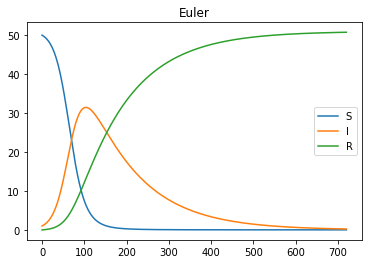

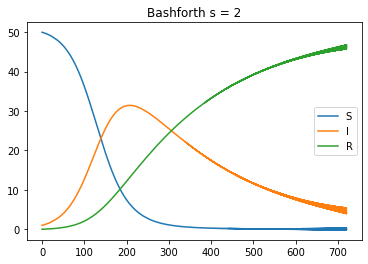

In [ ]:
days = 30
dt = 0.01
a = 0
b = days * 24

N = int((b - a) / dt)

S_0 = 50
I_0 = 1
R_0 = 0

beta = 10 / (40 * 8 * 24)
upslon = 3 / (15 * 24)

y_0 = [S_0, I_0, R_0] # SIR

def Eq_2(t, y):
  S = y[0]
  I = y[1]
  R = y[2]

  ds_dt = -beta * S * I
  di_dt = beta * S * I - upslon * I
  dr_dt = upslon * I

  return np.asarray([ds_dt, di_dt, dr_dt])

y_euler, t = euler(Eq_2, y_0, dt, a, b, N)
plot_sir(y_euler, t, "Euler")

y_bashforth, t = bashforth_2(Eq_2, y_0, dt, a, b, N)
plot_sir(y_bashforth, t, "Bashforth s = 2")

outputs_name = "Eq2"

d = dict_sir(y_euler, y_bashforth)

df = pd.DataFrame(d, index = t)
df.to_excel(f'{outputs_name}_outputs_n{N}.xlsx')

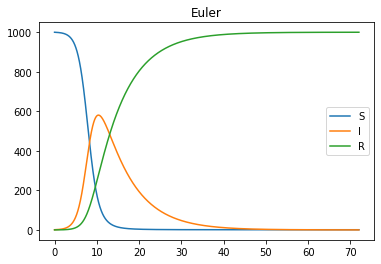

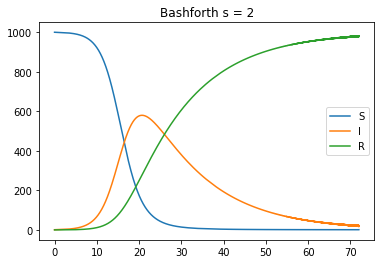

In [ ]:
days = 3
dt = 0.01
a = 0
b = days * 24

N = int((b - a) / dt)

S_0 = 1000
I_0 = 1
R_0 = 0

beta = 0.001
upslon = 1 / 7

y_0 = [S_0, I_0, R_0] # SIR

def Eq_2(t, y):
  S = y[0]
  I = y[1]
  R = y[2]

  ds_dt = -beta * S * I
  di_dt = beta * S * I - upslon * I
  dr_dt = upslon * I

  return np.asarray([ds_dt, di_dt, dr_dt])

y_euler, t = euler(Eq_2, y_0, dt, a, b, N)
plot_sir(y_euler, t, "Euler")

y_bashforth, t = bashforth_2(Eq_2, y_0, dt, a, b, N)
plot_sir(y_bashforth, t, "Bashforth s = 2")

outputs_name = "Eq2_Tabela"

d = {
        "Euler Explícito": y_euler,
        "Adams Bashfort": y_bashforth
    }

d = dict_sir(y_euler, y_bashforth)

df = pd.DataFrame(d, index = t)
df.to_excel(f'{outputs_name}_outputs_n{N}.xlsx')

# SIR Sem Imunidade Vitalícia


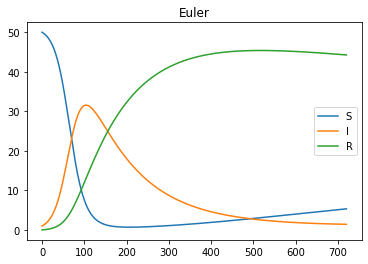

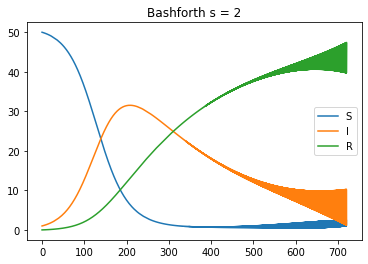

In [ ]:
days = 30
dt = 0.1
a = 0
b = days * 24

N = int((b - a) / dt)

S_0 = 50
I_0 = 1
R_0 = 0

beta = 10 / (40 * 8 * 24)
upslon = 3 / (15 * 24)
gamma = 1./(24 * 90)

y_0 = [S_0, I_0, R_0] # SIR

def Eq_3(t, y):
  S = y[0]
  I = y[1]
  R = y[2]

  ds_dt = -(beta * S * I) + (gamma * R)
  di_dt = (beta * S * I) - (upslon * I)
  dr_dt = (upslon * I) - (gamma * R)

  return np.asarray([ds_dt, di_dt, dr_dt])

y_euler, t = euler(Eq_3, y_0, dt, a, b, N)
plot_sir(y_euler, t, "Euler")

y_bashforth, t = bashforth_2(Eq_3, y_0, dt, a, b, N)
plot_sir(y_bashforth, t, "Bashforth s = 2")

outputs_name = "Eq3"

d = dict_sir(y_euler, y_bashforth)

df = pd.DataFrame(d, index = t)
df.to_excel(f'{outputs_name}_outputs_n{N}.xlsx')

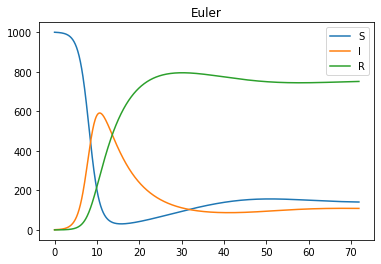

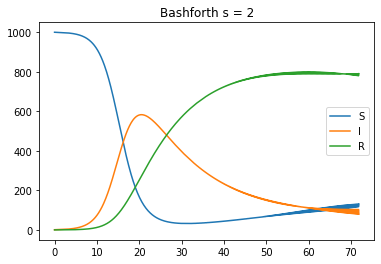

In [ ]:
# Tabela
days = 3
dt = 0.1
a = 0
b = days * 24

N = int((b - a) / dt)

S_0 = 1000
I_0 = 1
R_0 = 0

beta = 0.001
upslon = 1 / 7
gamma = 1 / 50

y_0 = [S_0, I_0, R_0] # SIR

def Eq_3(t, y):
  S = y[0]
  I = y[1]
  R = y[2]

  ds_dt = -(beta * S * I) + (gamma * R)
  di_dt = (beta * S * I) - (upslon * I)
  dr_dt = (upslon * I) - (gamma * R)

  return np.asarray([ds_dt, di_dt, dr_dt])

y_euler, t = euler(Eq_3, y_0, dt, a, b, N)
plot_sir(y_euler, t, "Euler")

y_bashforth, t = bashforth_2(Eq_3, y_0, dt, a, b, N)
plot_sir(y_bashforth, t, "Bashforth s = 2")

outputs_name = "Eq3_Tabela"

d = dict_sir(y_euler, y_bashforth)

df = pd.DataFrame(d, index = t)
df.to_excel(f'{outputs_name}_outputs_n{N}.xlsx')

# SIR com Dinâmica Vital

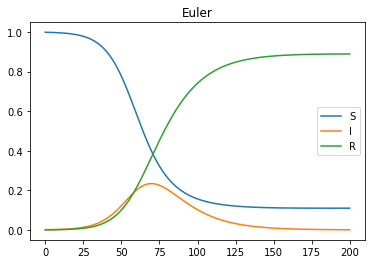

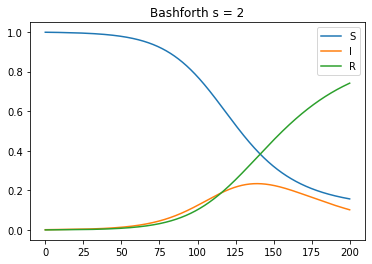

In [ ]:
days = 200
dt = round(1/24, 2)
a = 0
b = days

N = int((b - a) / dt)

S_0 = 0.999
I_0 = 0.001
R_0 = 0

y_0 = [S_0, I_0, R_0] # SIR

beta = 0.175075
upslon = round(1/14, 2)
mu = 3.00e-5

def Eq_6(t, y):
  S = y[0]
  I = y[1]
  R = y[2]

  ds_dt = mu -(beta * S * I) -(mu * S)
  di_dt = (beta * S * I) -(upslon * I) -(mu * I)
  dr_dt = (upslon * I) -(mu * R)

  return np.asarray([ds_dt, di_dt, dr_dt])

y_euler, t = euler(Eq_6, y_0, dt, a, b, N)
plot_sir(y_euler, t, "Euler")

y_bashforth, t = bashforth_2(Eq_6, y_0, dt, a, b, N)
plot_sir(y_bashforth, t, "Bashforth s = 2")

outputs_name = "Eq6"

d = dict_sir(y_euler, y_bashforth)

df = pd.DataFrame(d, index = t)
df.to_excel(f'{outputs_name}_outputs_n{N}.xlsx')

# SIR com Dinâmica vital e Perda de Imunidade

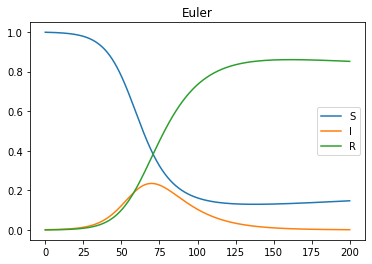

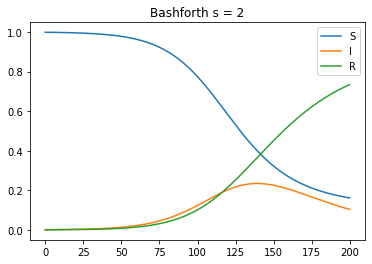

In [ ]:
days = 200
dt = round(1/24, 2)
a = 0
b = days

N = int((b - a) / dt)

S_0 = 0.999
I_0 = 0.001
R_0 = 0

y_0 = [S_0, I_0, R_0] # SIR

beta = 0.175075
upslon = round(1/14, 2)
gamma = 1 / (24 * 90) # ?
mu = 3.00e-5
#A = (R_0 * mu * (upslon + mu)) / beta
A = mu

def Eq_7(t, y):
  S = y[0]
  I = y[1]
  R = y[2]

  ds_dt = A -(beta * S * I) +(gamma * R) -(mu * S)
  di_dt = (beta * S * I) -(upslon * I) - (mu * I)
  dr_dt = (upslon * I) -(gamma*R) -(mu * R)

  return np.asarray([ds_dt, di_dt, dr_dt])

y_euler, t = euler(Eq_7, y_0, dt, a, b, N)
plot_sir(y_euler, t, "Euler")

y_bashforth, t = bashforth_2(Eq_7, y_0, dt, a, b, N)
plot_sir(y_bashforth, t, "Bashforth s = 2")

outputs_name = "Eq7"

d = dict_sir(y_euler, y_bashforth)

df = pd.DataFrame(d, index = t)
df.to_excel(f'{outputs_name}_outputs_n{N}.xlsx')

# SIR com vacinação

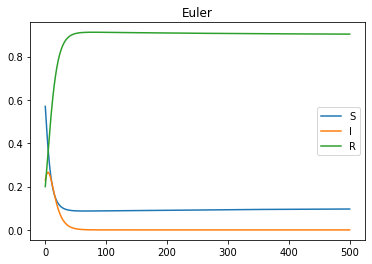

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in double_scalars


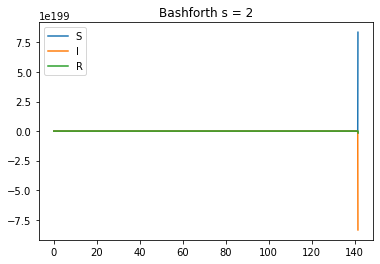

In [59]:
days = 500
dt = 0.1
a = 0
b = days

N = int((b - a) / dt)

S_0 = 0.57
I_0 = 0.23
R_0 = (1 - S_0 - I_0)

y_0 = [S_0, I_0, R_0] # SIR

beta = 0.35
upslon = 0.13

mu = 0.003 #0.013
p = 0.9 # 0
N_t = 1

def Eq_20(t, y):
  S = y[0]
  I = y[1]
  R = y[2]
  
  ds_dt = (mu*N_t*(1 - p)) -(beta * S * I) -(mu * S)
  di_dt = (beta * S * I) -(upslon * I) -(mu * I)
  dr_dt = (upslon * I) -(mu*R) +(mu * N_t * p)

  return np.asarray([ds_dt, di_dt, dr_dt])

'''
Resultados
'''

y_euler, t = euler(Eq_20, y_0, dt, a, b, N)
plot_sir(y_euler, t, "Euler")

y_bashforth, t = bashforth_2(Eq_20, y_0, dt, a, b, N)
plot_sir(y_bashforth, t, "Bashforth s = 2")

outputs_name = "Eq20"

d = dict_sir(y_euler, y_bashforth)

df = pd.DataFrame(d, index = t)
df.to_excel(f'{outputs_name}_outputs_n{N}.xlsx')

# SEIR

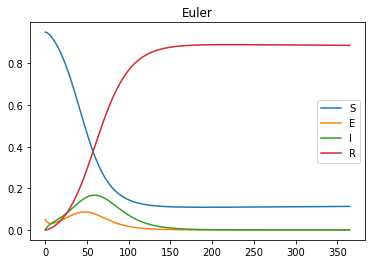

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in double_scalars


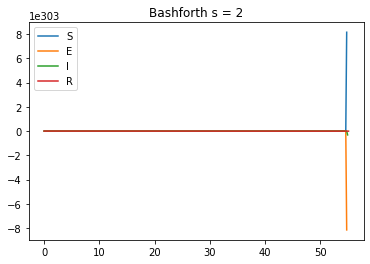

In [55]:
days = 365
dt = 1/6
a = 0
b = days

N = int((b - a) / dt)

S_0 = 0.95
E_0 = 0.05
I_0 = 0
R_0 = 0

y_0 = [S_0, E_0, I_0, R_0] # SEIR

beta = 0.175110
k = 1/6.5
upslon = 1/14
mu = 3.00e-5

def Eq_21(t, y):
  S = y[0]
  E = y[1]
  I = y[2]
  R = y[3]

  ds_dt = mu -(beta * S * I) -(mu * S)
  de_dt = (beta * S * I) -(k * E) -(mu * E)
  di_dt = (k * E) -(upslon * I) -(mu * I)
  dr_dt = (upslon * I) - (mu*R)

  return np.asarray([ds_dt, de_dt, di_dt, dr_dt])

'''
Resultados
'''

y_euler, t = euler(Eq_21, y_0, dt, a, b, N)
plot_seir(y_euler, t, "Euler")

y_bashforth, t = bashforth_2(Eq_21, y_0, dt, a, b, N)
plot_seir(y_bashforth, t, "Bashforth s = 2")

outputs_name = "Eq21"

d = dict_seir(y_euler, y_bashforth)

df = pd.DataFrame(d, index = t)
df.to_excel(f'{outputs_name}_outputs_n{N}.xlsx')

In [56]:
print(y_euler[-1])

[1.12969537e-01 1.15627152e-07 6.44225790e-07 8.87029704e-01]


# SEIR com A

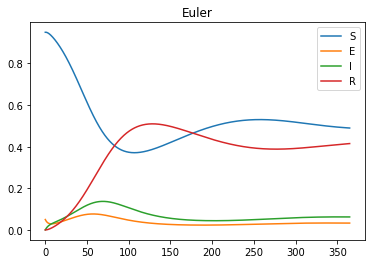

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in double_scalars


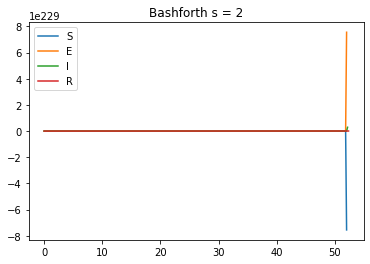

In [ ]:
days = 365
dt = 1/6
a = 0
b = days

N = int((b - a) / dt)

S_0 = 0.95
E_0 = 0.05
I_0 = 0
R_0 = 0

y_0 = [S_0, E_0, I_0, R_0] # SEIR

beta = 0.175110
gamma = 0
upslon = 1/14

mu = 0.01
k = 1/6.5
A = mu # (R_0 * mu * ((upslon + mu) * (k + mu))) / (beta * k)
N_t = 1

def Eq_22(t, y):
  S = y[0]
  E = y[1]
  I = y[2]
  R = y[3]

  ds_dt = A  -(beta * S * I) +(gamma * R) -(mu * S)
  de_dt = (beta * S * I) -(k * E) -(mu * E)
  di_dt = (k * E) -(upslon * I) -(mu * I)
  dr_dt = (upslon * I) -(gamma * R) -(mu*R)

  return np.asarray([ds_dt, de_dt, di_dt, dr_dt])

'''
Resultados
'''

y_euler, t = euler(Eq_22, y_0, dt, a, b, N)
plot_seir(y_euler, t, "Euler")

y_bashforth, t = bashforth_2(Eq_22, y_0, dt, a, b, N)
plot_seir(y_bashforth, t, "Bashforth s = 2")

outputs_name = "Eq22"

d = dict_seir(y_euler, y_bashforth)

df = pd.DataFrame(d, index = t)
df.to_excel(f'{outputs_name}_outputs_n{N}.xlsx')

# SEIR com período de incubação

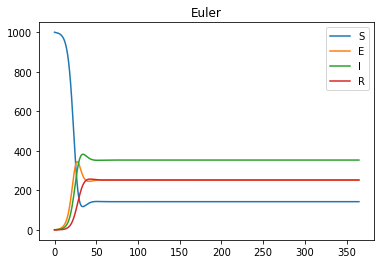

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in double_scalars


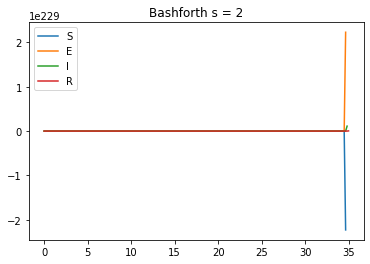

In [ ]:
days = 365
dt = 1/6
a = 0
b = days

N = int((b - a) / dt)

S_0 = 1000
E_0 = 0
I_0 = 1
R_0 = 0

y_0 = [S_0, E_0, I_0, R_0] # SEIR

beta = 0.001
k = 1/5
upslon = 1/7
gamma = 1/5

def Eq_23(t, y):
  S = y[0]
  E = y[1]
  I = y[2]
  R = y[3]

  ds_dt = -(beta * S * I) +(gamma * R)
  de_dt = (beta * S * I) -(k * E)
  di_dt = (k * E) -(upslon * I)
  dr_dt = (upslon * I) -(gamma * R)

  return np.asarray([ds_dt, de_dt, di_dt, dr_dt])

'''
Resultados
'''

y_euler, t = euler(Eq_23, y_0, dt, a, b, N)
plot_seir(y_euler, t, "Euler")

y_bashforth, t = bashforth_2(Eq_23, y_0, dt, a, b, N)
plot_seir(y_bashforth, t, "Bashforth s = 2")

outputs_name = "Eq23"

d = dict_seir(y_euler, y_bashforth)

df = pd.DataFrame(d, index = t)
df.to_excel(f'{outputs_name}_outputs_n{N}.xlsx')

# SEEIIR

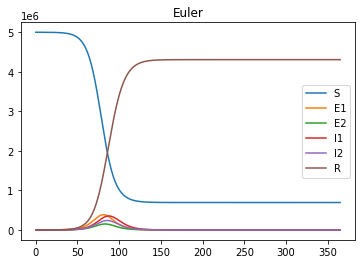

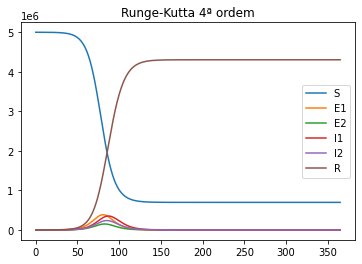

In [ ]:
days = 365
dt = 0.1
a = 0
b = days

N = int((b - a) / dt)

S_0 = 5e6
E_0 = 0
Ea_0 = 100
I_0 = 1
Ia_0 = 0
R_0 = 0

y_0 = [S_0, E_0, Ea_0, I_0, Ia_0, R_0] # SEEIIR

beta = 0.5
ria = 0.1
rea = 1.15
lambda1 = 0.33
lambda2 = 0.5
pa = 0.4
mu = 0.2
N_t = S_0 + E_0 + Ea_0 + I_0 + Ia_0 + R_0
#N_t = 1

def Eq_29(t, y):
  S = y[0]
  E = y[1]
  Ea = y[2]
  I = y[3]
  Ia = y[4]
  R = y[5]

  ds_dt = -(beta * (S*I/N_t)) -(ria*beta*(S*Ia/N_t)) -(rea*beta*(S*Ea/N_t))
  de_dt = (beta * (S*I/N_t)) +(ria*beta*(S*Ia/N_t)) +(rea*beta*(S*Ea/N_t)) -(lambda1*E)
  dea_dt = (lambda1*(1 - pa)*E) -(lambda2 * Ea)
  di_dt = (lambda2 * Ea) -(mu * I)
  dia_dt = (lambda1 * pa * E) -(mu * Ia)
  dr_dt = mu*(I + Ia)

  return np.asarray([ds_dt, de_dt, dea_dt, di_dt, dia_dt, dr_dt])

'''
Resultados
'''

y_euler, t = euler(Eq_29, y_0, dt, a, b, N)
plot_seeiir(y_euler, t, "Euler")

y_rk, t = RK4(Eq_29, y_0, dt, a, b, N)
plot_seeiir(y_rk, t, "Runge-Kutta 4ª ordem")

outputs_name = "Eq29"

d = dict_seeiir(y_euler, y_rk)

df = pd.DataFrame(d, index = t)
df.to_excel(f'{outputs_name}_outputs_n{N}.xlsx')